# Teen Marketing Classification 

# K-Means Clustering

#### Importing required libraries

In [109]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset

In [110]:
os.getcwd()

'C:\\Users\\archana\\Desktop\\DSP\\Py'

In [111]:
os.chdir("C:\\Users\\archana\\Desktop\\DSP\\Py")
data= pd.read_csv("snsdata.csv")

In [112]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dataset has 30000 observations and 40 features.

In [113]:
data.shape

(30000, 40)

In [114]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [115]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24914 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


### Handling missing values

In [117]:
data.isnull().sum().sort_values(ascending=False)

age             5086
gender          2724
drugs              0
cheerleading       0
hot                0
sexy               0
sex                0
cute               0
sports             0
tennis             0
baseball           0
swimming           0
drunk              0
volleyball         0
softball           0
soccer             0
football           0
basketball         0
friends            0
kissed             0
dance              0
band               0
blonde             0
death              0
die                0
abercrombie        0
hollister          0
clothes            0
shopping           0
mall               0
dress              0
marching           0
hair               0
bible              0
jesus              0
church             0
god                0
rock               0
music              0
gradyear           0
dtype: int64

In [118]:
data.gender.value_counts(dropna=False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

Fiiling missing values for 'Gender' with 'not-disclosed'

In [119]:
data.gender.fillna('not disclosed',inplace=True)

In [120]:
data.age.describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

Filling missing values for Age(grouped by Gradyear) by the mean value .
We group Age by Gradyear as there is a relation between these as shown below. As gradyear dec, age increases.

In [121]:
data.groupby('gradyear').age.mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [122]:
data.age = data.groupby('gradyear').transform(lambda x:x.fillna(x.mean()))

In [123]:
data.isnull().any().sum()

0

### Handling Outliers

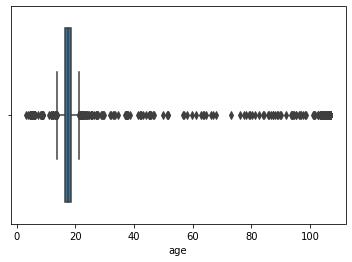

In [124]:
sns.boxplot(data.age)

In [125]:
data.age.describe()

count    30000.000000
mean        17.982148
std          7.169862
min          3.086000
25%         16.504000
50%         17.443000
75%         18.391459
max        106.927000
Name: age, dtype: float64

Min value for age is 3 and Max value is 106. 
But for high school student related data, these values are unrealistic. 
Hence these have to be removed.

### Removing outliers using the quartile values

In [126]:
q1=data.age.quantile(.25)
q3=data.age.quantile(.75)
iqr= q3-q1
print(q1)
print(q3)
print(iqr)

16.504
18.39145922406969
1.887459224069687


In [127]:
data=data[ (data.age> (q1-1.5*iqr) ) & (data.age<(q3 +1.5*iqr) ) ]

In [128]:
data.age.describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

Plot after removing outliers

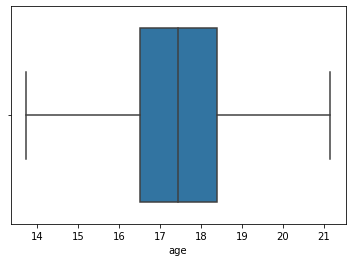

In [129]:
sns.boxplot(data.age)

### Data Preprocessing

Data to be scaled/normalised before any analysis using distance calculations

Features for clustering are seperated

In [130]:
names= data.columns[4:40]

In [131]:
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [132]:
scaled_feature= data.copy()

In [133]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
features=scaled_feature[names]

In [135]:
features.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,...,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000
mean,0.268316,0.253737,0.222758,0.162353,0.143590,0.134647,0.107549,0.105524,0.087301,0.139979,...,0.099146,0.258259,0.354875,0.149158,0.070091,0.051429,0.184085,0.114669,0.088179,0.059967
std,0.806536,0.706848,0.918422,0.742582,0.641337,0.517863,0.516933,0.523897,0.517223,0.467901,...,1.953674,0.697219,0.726507,0.473898,0.347751,0.280510,0.625750,0.438140,0.399809,0.337858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,...,327.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


### Standardisation of the feature values

In [136]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
features = scaler.fit_transform(features.values)

In [137]:
scaled_feature[names] = features

In [138]:
scaled_feature.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,29633.000000,29633.000000,29633.000000,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,...,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04,2.963300e+04
mean,2007.498498,17.377469,30.239227,-2.741445e-16,-6.329242e-15,-1.676456e-14,2.178747e-15,1.222767e-14,-7.454908e-15,-8.127134e-15,...,3.510819e-15,-8.964939e-15,5.452265e-15,1.116571e-14,2.302592e-14,1.792352e-14,-3.693132e-15,9.311591e-16,-2.640508e-15,-1.139343e-15
std,1.117976,1.147764,36.586961,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,13.719000,0.000000,-3.326823e-01,-3.589764e-01,-2.425488e-01,-2.186365e-01,-2.238954e-01,-2.600100e-01,-2.080558e-01,...,-5.074945e-02,-3.704198e-01,-4.884751e-01,-3.147527e-01,-2.015579e-01,-1.833446e-01,-2.941882e-01,-2.617232e-01,-2.205559e-01,-1.774944e-01
25%,2006.000000,16.501000,3.000000,-3.326823e-01,-3.589764e-01,-2.425488e-01,-2.186365e-01,-2.238954e-01,-2.600100e-01,-2.080558e-01,...,-5.074945e-02,-3.704198e-01,-4.884751e-01,-3.147527e-01,-2.015579e-01,-1.833446e-01,-2.941882e-01,-2.617232e-01,-2.205559e-01,-1.774944e-01
50%,2007.000000,17.426000,20.000000,-3.326823e-01,-3.589764e-01,-2.425488e-01,-2.186365e-01,-2.238954e-01,-2.600100e-01,-2.080558e-01,...,-5.074945e-02,-3.704198e-01,-4.884751e-01,-3.147527e-01,-2.015579e-01,-1.833446e-01,-2.941882e-01,-2.617232e-01,-2.205559e-01,-1.774944e-01
75%,2008.000000,18.387000,44.000000,-3.326823e-01,-3.589764e-01,-2.425488e-01,-2.186365e-01,-2.238954e-01,-2.600100e-01,-2.080558e-01,...,-5.074945e-02,-3.704198e-01,8.879973e-01,-3.147527e-01,-2.015579e-01,-1.833446e-01,-2.941882e-01,-2.617232e-01,-2.205559e-01,-1.774944e-01
max,2009.000000,21.158000,830.000000,2.942471e+01,2.086236e+01,2.915619e+01,2.267484e+01,2.160588e+01,5.960244e+01,1.720263e+01,...,1.673290e+02,1.684110e+01,1.465272e+01,1.656682e+01,2.567946e+01,2.833660e+01,3.486419e+01,3.169208e+01,1.978935e+01,4.718045e+01


### Encoding the 'Gender' feature

In [139]:
from sklearn.preprocessing import LabelEncoder
label_ec = LabelEncoder()

scaled_feature.gender = label_ec.fit_transform(scaled_feature.gender.values)

In [140]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
1,2006,0,18.801,0,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,1.063874,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
2,2006,1,18.335,69,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,2.020691,-0.220556,-0.177494
3,2006,0,18.875,0,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
4,2006,2,18.995,10,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,2.264470,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,2.280682,2.782377


### dummy model creation for KMeans classification 

In [141]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5,random_state=0,n_jobs=-1)

In [142]:
model = kmeans.fit(scaled_feature)

### Elbow curve for KMeans Clustering

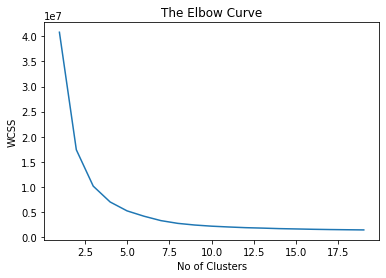

In [143]:
wcss = []
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=100 ,n_init=10,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS") #also called inertia
plt.show()

#WCSS stands for total within-cluster sum of square.also called inertia
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
#n_init : int, default: 10  ..Number of time the k-means algorithm will be run with different centroid seeds.


From the analysis of the above curve, appropriate number of clusters would be 5

### Fit K-Means Clustering for k=5

In [144]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5,random_state=0,n_jobs=-1)
kmeans.fit(scaled_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

kmeans.labels_ will be created as a result of the above clustering

In [145]:
len(kmeans.labels_)

29633

In [146]:
scaled_feature['cluster']=kmeans.labels_

### Visualizing Clustering for k=5

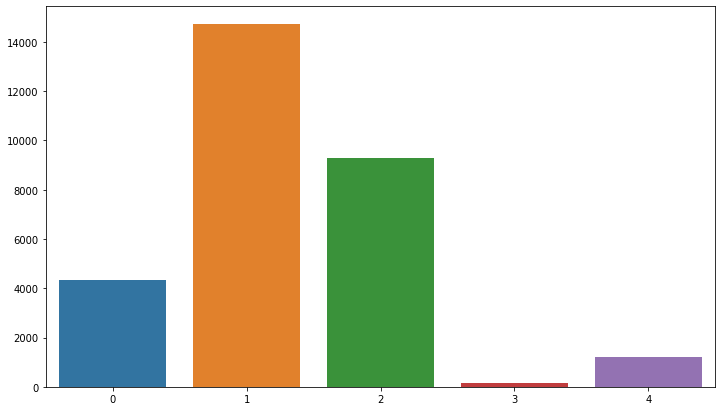

In [147]:
plt.figure(figsize=(12,7))
sns.barplot(x=np.arange(0,5,1),y= scaled_feature.groupby(['cluster']).count().age.values)

No of students(size) in each cluster

In [148]:
size_array=list(scaled_feature.groupby(['cluster']).count().age.values)

In [149]:
size_array

[4317, 14707, 9265, 142, 1202]

### Cluster Statistics

In [151]:
scaled_feature.groupby(['cluster']).mean()[['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs']]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.075445,0.045099,0.054821,0.100485,0.056029,0.040584,0.063951,0.043089,0.009907,0.027086,...,0.004504,0.093059,0.128817,0.049900,0.072886,0.090822,-0.017286,0.017961,0.005407,-0.010886
1,-0.054219,-0.033256,-0.033472,-0.054457,-0.053093,-0.035748,-0.040346,-0.027119,-0.012350,-0.026692,...,-0.009437,-0.054538,-0.076104,-0.028936,-0.042396,-0.039601,-0.008187,-0.029090,-0.009327,0.013095
2,0.029850,0.023534,0.024344,0.021192,0.043360,0.030950,0.006798,0.014075,0.012762,0.030471,...,0.010243,0.010252,0.031212,0.016183,0.006086,-0.004806,0.014567,0.028721,-0.000263,-0.011052
3,0.077704,0.049509,0.071835,0.065872,0.127489,0.175155,0.078035,0.080863,-0.019018,0.001851,...,0.014135,0.023506,0.219148,0.131063,0.142712,0.343873,0.043440,0.059744,0.131731,-0.031585
4,0.153165,0.057682,0.016527,0.134278,0.099115,0.032378,0.202346,0.059011,0.019405,-0.005787,...,0.018663,0.251267,0.202051,0.034606,0.193189,0.154766,0.044845,0.062980,0.081174,-0.032210


The above shows coordinates for each of the cluster centroids.

Clustering model created and the students are classified to 5 clusters as per their intrests

### Fit K-Means Clustering for k=3

In [152]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3,random_state=0,n_jobs=-1)
kmeans.fit(scaled_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [153]:
scaled_feature['cluster']=kmeans.labels_

### Visualizing Clustering for k =3

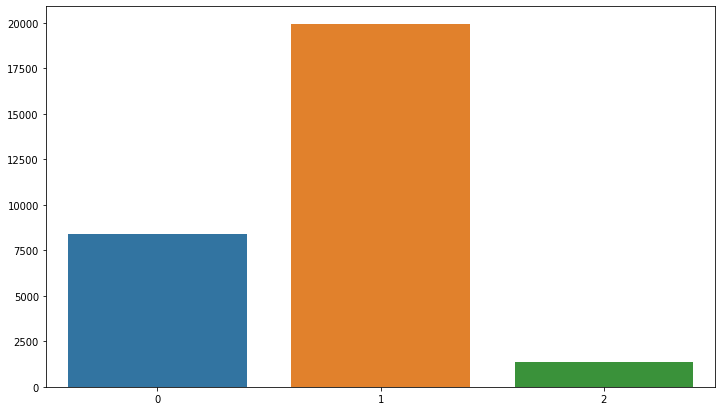

In [154]:
plt.figure(figsize=(12,7))
sns.barplot(x=np.arange(0,3,1),y= scaled_feature.groupby(['cluster']).count().age.values)

No of students in each cluster

In [155]:
size_array=list(scaled_feature.groupby(['cluster']).count().age.values)

In [156]:
size_array

[8387, 19902, 1344]

From the above classification of students into 3 cluster groups create tradeoff.
Thus we can conclude that k=5 gives better clustering of the students and is better